Data loaded and cleaned successfully.
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
Geopolitical events DataFrame created successfully.
  event_date                                 event_name  \
0 1990-08-02  Iraqi Invasion of Kuwait (First Gulf War)   
1 1991-01-17              Operation Desert Storm begins   
2 1997-07-02              Asian Financial Crisis begins   
3 2001-09-11                       September 11 Attacks   
4 2003-03-20         Invasion of Iraq (Second Gulf War)   

                                       description  
0      Major supply disruption and price increase.  
1     Resolution of conflict,

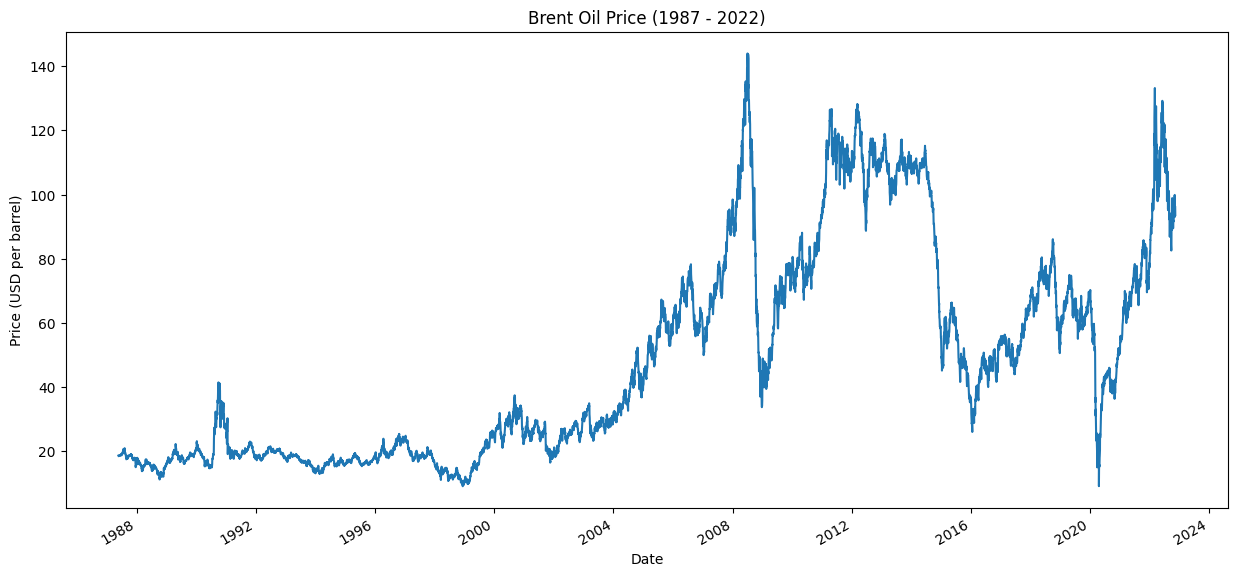

Running Augmented Dickey-Fuller Test on Raw Prices...
ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


In [13]:
# Cell 1: Import scripts and libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from data_ingestion import load_and_clean_data
from event_research import compile_geopolitical_events

# Cell 2: Load and Prepare Data
file_path = "../data/raw/BrentOilPrices.csv"
brent_prices_df = load_and_clean_data(file_path)

if brent_prices_df is not None:
    events_df = compile_geopolitical_events()
    # Save processed data for later use in Task 2
    brent_prices_df.to_csv("../data/processed/brent_prices_cleaned.csv")
    events_df.to_csv("../data/processed/geopolitical_events.csv", index=False)

# Cell 3: Visualize the Time Series
if brent_prices_df is not None:
    plt.figure(figsize=(15, 7))
    brent_prices_df['Price'].plot(title="Brent Oil Price (1987 - 2022)")
    plt.xlabel('Date')
    plt.ylabel('Price (USD per barrel)')
    plt.show()

# Cell 4: Check for Stationarity
if brent_prices_df is not None:
    print("Running Augmented Dickey-Fuller Test on Raw Prices...")
    result = adfuller(brent_prices_df['Price'].dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    
    # Conclusion and Discussion:
    # A large p-value (e.g., > 0.05) suggests the series is non-stationary,
    # justifying the use of a change point model that can handle these shifts.